In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random



dfTrain = np.loadtxt("ZipDigits.train",delimiter=" ",usecols=range(0, 257))

dfTest = np.loadtxt("ZipDigits.test",delimiter=" ",usecols=range(0, 257))

print("df train :",dfTrain.shape)
print("df test :", dfTest.shape)

filtered_dfTrain = []
filtered_dfTest = []

filtered_dfTrain = dfTrain[(dfTrain[:, 0] == 1) | (dfTrain[:, 0] == 5)]
filtered_dfTest = dfTest[(dfTest[:, 0] == 1) | (dfTest[:, 0] == 5)]

filtered_dfTrain[:, 0] = np.where(filtered_dfTrain[:, 0] == 1, 1, -1)
filtered_dfTest[:, 0] = np.where(filtered_dfTest[:, 0] == 1, 1, -1)

def intensity(image):
    pixels = image[1:]
    #print(pixels.shape)
    return np.mean(pixels)

def hor_symmetry(image):
    # 16 x 16 = 256
    image_2d = image[1:].reshape(16, 16)
    upper_half = image_2d[:8,:]
    lower_half = image_2d[8:,:]
    lower_half_flipped = np.flipud(lower_half)
    return np.mean(np.abs(upper_half - lower_half_flipped))

intensities = np.array([intensity(img) for img in filtered_dfTrain])
symmetries = np.array([hor_symmetry(img) for img in filtered_dfTrain])
labels = filtered_dfTrain[:, 0]

df_train = pd.DataFrame({'x0': 1, 'x1':intensities, 'x2':symmetries, 'y':labels})


intensities_test = np.array([intensity(img) for img in filtered_dfTest])
symmetries_test = np.array([hor_symmetry(img) for img in filtered_dfTest])
labels_test = filtered_dfTest[:, 0]
df_test = pd.DataFrame({'x0': 1, 'x1':intensities_test, 'x2':symmetries_test, 'y':labels_test})

df train : (7291, 257)
df test : (2007, 257)


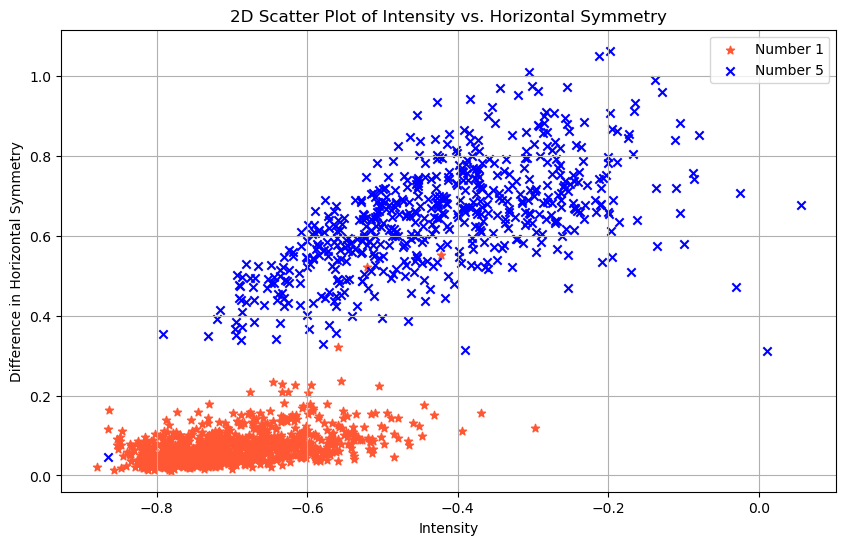

In [54]:
# Training data
plt.figure(figsize=(10, 6))
plt.scatter(intensities[labels==1], symmetries[labels==1], color = '#FF5733', marker='*', label='Number 1')
plt.scatter(intensities[labels==-1], symmetries[labels==-1], color = 'blue', marker='x', label='Number 5')

plt.xlabel("Intensity")
plt.ylabel("Difference in Horizontal Symmetry")
plt.title("2D Scatter Plot of Intensity vs. Horizontal Symmetry")
plt.legend()
plt.grid(True)
plt.show()

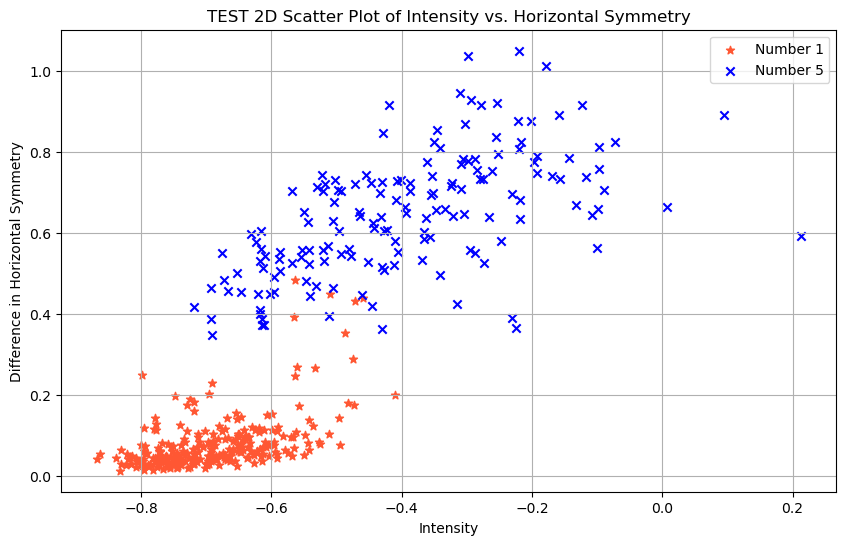

In [55]:
# Test data
plt.figure(figsize=(10, 6))
plt.scatter(intensities_test[labels_test==1], symmetries_test[labels_test==1], color = '#FF5733', marker='*', label='Number 1')
plt.scatter(intensities_test[labels_test==-1], symmetries_test[labels_test==-1], color = 'blue', marker='x', label='Number 5')

plt.xlabel("Intensity")
plt.ylabel("Difference in Horizontal Symmetry")
plt.title("TEST 2D Scatter Plot of Intensity vs. Horizontal Symmetry")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
def check_for_misclassified(w):
  misclassified = []
  w = np.array(w)
  signs = np.sign(np.dot(df_train.iloc[:, :3].values, w))
  y = df_train.iloc[:, 3].values

  mismatches = np.where(signs != y)[0]
  return mismatches

In [57]:
df_train.iloc[:, :3]

,x0,x1,x2
0,1,-0.111738,0.840477
1,1,-0.753914,0.059531
2,1,-0.772281,0.070547
3,1,-0.769258,0.037000
4,1,-0.795438,0.043797
...,...,...,...
1556,1,-0.289414,0.585484
1557,1,-0.534238,0.592164
1558,1,-0.609793,0.088102
1559,1,-0.662309,0.052742


In [58]:
def plot_graph(w, msg):
  col = df_train['y'].map({-1:'b', 1:'r'})
  df_train.plot.scatter(x='x1', y='x2', c=col)
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = np.array(axes.get_ylim())
  y_vals = -w[0]/w[2] - w[1]/w[2] * x_vals
  plt.title(msg)
  plt.plot(x_vals, y_vals, '--')

Ein_pla=[]
def perceptron():
  w = [0,0,0]
  misclassified = check_for_misclassified(w)
  i=0

  while(len(misclassified)!=0 and i<1000):
    Ein_pla.append(len(misclassified)/len(df_train))
    list_of_misclass = random.choice(list(misclassified.keys()))
    x = df_train.iloc[list_of_misclass][:3].values
    y = df_train.iloc[list_of_misclass][3]

    w = w + x*y

    misclassified = check_for_misclassified(w)
    i=i+1
  print("PLA")
  print("Ein:",np.mean(Ein_pla))
  print("This is the final weight: ",w)
  plot_graph(w, "PLA")
  return w

# w = perceptron()
# # print(w)
# # Assuming df_test contains your test data, and the last column is the label
# X_test = df_test.iloc[:, :-1].values  # Extract input features
# y_test = df_test.iloc[:, -1].values   # Extract true labels

# # Predict using the final weights from the pocket algorithm
# y_pred = np.sign(np.dot(X_test,w))

# # Compute error rate
# error_rate_test = np.mean(y_pred != y_test)
# print(f"Error rate on test set: {error_rate_test:.2f}")

in if
in if
in if
in if
in if
in if
Ein nan
This is the final weight:  [ 0.         -1.07227344 -2.19770312]


C:\Users\somes\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\somes\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


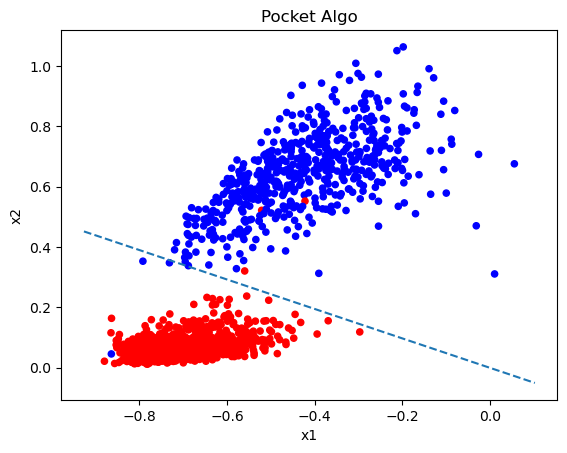

In [67]:
def pocketAlgo(misclassified_method, w_maybeNew):
  i=0
  Ein_list = []
  w_pocket = w_maybeNew
  misclassified_pocket = misclassified_method(w_maybeNew)
  while i<100:
      list_of_misclass = misclassified_method(w_maybeNew)[0]
      # Ein = len(misclassified)/len(df_train)
      # Ein_list.append(Ein)
        
      x = df_train.iloc[list_of_misclass][:3].values
      y = df_train.iloc[list_of_misclass][3]

      w_maybeNew = w_maybeNew + x*y
      misclassified_new = misclassified_method(w_maybeNew)
      # print(list_of_misclass,len(misclassified_new), w_maybeNew, len(misclassified_pocket), w_pocket)

      if len(misclassified_new) < len(misclassified_pocket):
          print("in if")
          w_pocket = w_maybeNew.copy()
          misclassified_pocket = misclassified_new
      
      i=i+1

  print("Ein",np.mean(Ein_list))
  print("This is the final weight: ",w_pocket)

  plot_graph(w_pocket, "Pocket Algo")
  return w_pocket

w_pocket = [1,1,1]
w_pocket = [0,0,0]
w_pocket = pocketAlgo(check_for_misclassified, w_pocket)

In [ ]:

X_test = df_test.iloc[:, :-1].values  # Extract input features
y_test = df_test.iloc[:, -1].values   # Extract true labels

y_pred = np.sign(np.dot(X_test,w_pocket))

error_rate_test = np.mean(y_pred != y_test)
print(f"Error rate on test set: {error_rate_test:.2f}")


In [ ]:
# print(df_train)
df_train['x1*x2'] = df_train['x1']*df_train['x2']
df_train['x1^2'] = df_train['x1']**2
df_train['x2^2'] = df_train['x2']**2
df_train['x1^3'] = df_train['x1']**3
df_train['x2^3'] = df_train['x2']**3
df_train['x1^2*x2'] = df_train['x1']**2 * df_train['x2']
df_train['x1*x2^2'] = df_train['x1'] * df_train['x2']**2

cols = [col for col in df_train if col != 'y'] + ['y']
df = df_train[cols]
# print(df)